# Kickstarter Data Analysis

In [91]:
# Loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Data Cleaning

In [92]:
# Importing data
kickstarter2018 = pd.read_csv('archive/ks-projects-201801.csv')

In [93]:
# First look at dataset
kickstarter2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000.0,8/11/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.0,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.0,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.0,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500.0,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [94]:
# Summarizing the catagrical variables before cleaning
kickstarter2018.describe(include=['object'])

,name,category,main_category,currency,deadline,launched,state,country
count,378657,378661,378661,378661,378661,378661,378661,378661
unique,375722,159,15,14,3164,347035,6,23
top,#NAME?,Product Design,Film & Video,USD,8/8/2014,6/20/2017 16:00,failed,US
freq,43,22314,63585,295365,705,15,197719,292627


In [95]:
# Summarizing numerical variables before cleaning
kickstarter2018.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [96]:
# Counting missing values in each column
kickstarter2018.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [97]:
# Removing unnecessary columns from dataset
kickstarter2018 = kickstarter2018[['name', 
                                          'category', 
                                          'main_category', 
                                          'currency', 
                                          'deadline', 
                                          'launched', 
                                          'state', 
                                          'backers', 
                                          'country', 
                                          'usd_pledged_real', 
                                          'usd_goal_real']]


# Removing four rows with null values for name
kickstarter2018.dropna(inplace = True)
kickstarter2018 = kickstarter2018[kickstarter2018.name != '#NAME?']

In [98]:
def convertDate(row):
    return(datetime.strptime(row, "%m/%d/%Y").date())

def convertDateTime(row):
    return(datetime.strptime(row, "%m/%d/%Y %H:%M").date())

def computeDuration(row):
    return (row['deadline'] - row['launched']).days

In [99]:
# Converting all date strings to datetime objects and computing the number of days it was live
kickstarter2018['deadline'] = kickstarter2018['deadline'].apply(convertDate)
kickstarter2018['launched'] = kickstarter2018['launched'].apply(convertDateTime)
kickstarter2018['duration'] = kickstarter2018[['deadline', 'launched']].apply(computeDuration, axis = 1)

In [100]:
# Summarizing the catagrical variables after cleaning
kickstarter2018.describe(include=['object'])

,name,category,main_category,currency,deadline,launched,state,country
count,378614,378614,378614,378614,378614,378614,378614,378614
unique,375721,159,15,14,3164,3169,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,2014-07-09,failed,US
freq,41,22312,63581,295334,705,928,197698,292596


In [101]:
# Summarizing numerical variables after cleaning
kickstarter2018.describe()

,backers,usd_pledged_real,usd_goal_real,duration
count,378614.000000,3.786140e+05,3.786140e+05,378614.000000
mean,105.611079,9.058454e+03,4.545586e+04,34.480870
std,907.223799,9.097778e+04,1.153021e+06,65.913098
min,0.000000,0.000000e+00,1.000000e-02,1.000000
25%,2.000000,3.100000e+01,2.000000e+03,30.000000
50%,12.000000,6.244100e+02,5.500000e+03,30.000000
75%,56.000000,4.050000e+03,1.550000e+04,37.000000
max,219382.000000,2.033899e+07,1.663614e+08,16739.000000


### Exploratory Analysis and Data Visualization

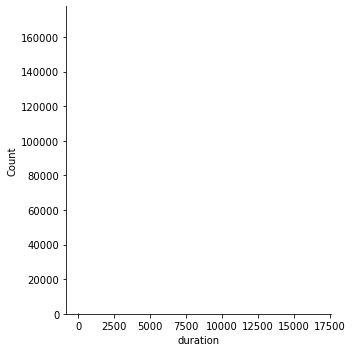

In [105]:
sns.displot(kickstarter2018, x="duration")